### Lab Tutor: Tejumade Afonja

LinkedIn: https://www.linkedin.com/in/tejumadeafonja/

Website: [tejuafonja.com](https://tejuafonja.com)

Community Lead: [AI Saturdays Lagos](https://github.com/AISaturdaysLagos/cohort_structure)

# Nonlinear Modeling and Generalization
This lab delves into the complexities of nonlinear modeling, with a focus on enhancing the prediction of song popularity using advanced feature engineering and machine learning techniques. The lab is structured in two parts:

### Part One: Understanding Nonlinear Modeling
- **Nonlinear Techniques**: Introduction to polynomial and radial basis features to capture non-linear relationships in data.
- **Overfitting**: Exploration of overfitting, a common pitfall in complex models, and how it can skew predictive performance.
- **Regularization**: Discussion of regularization techniques as a means to prevent overfitting by penalizing model complexity.
- **Cross-validation**: Detailed walkthrough of cross-validation methods to assess model reliability and guard against over-optimistic performance estimates.

### Part Two: Predictive Feature Engineering
- **Predictive Modeling**: Application of nonlinear modeling techniques to predict song popularity within the Spotify Nigeria dataset.
- **Feature Selection**: Selection and justification of features based on their predictive power, using both dataset attributes and domain knowledge.
- **External Data Augmentation**: Integration of external datasets to create a richer feature set, guided by insights into the music industry and song popularity metrics.
- **Model Evaluation**: Systematic evaluation of the model's performance, leveraging cross-validation and regularization to achieve a robust prediction mechanism.

Throughout the lab, participants will gain hands-on experience with Python and machine learning libraries, applying theoretical concepts to real-world data. By the end, participants will have a nuanced understanding of how to tackle overfitting, select meaningful features, and validate the performance of sophisticated nonlinear models.


This tutorial is inspired by the Nonlinear Modeling lecture from the [CMU Practical Data Science course](http://www.datasciencecourse.org/notes/nonlinear_modeling/). While the original lecture used the temperature demand dataset, in this tutorial, we will delve into the Nigerian Spotify Songs dataset. The dataset can be obtained from Kaggle using [this link](https://www.kaggle.com/datasets/sootersaalu/nigerian-songs-spotify/).

The Nigerian Spotify Songs dataset offers insights into the audio features of tracks produced by Nigerian artists. Sourced using Spotify's API, the dataset not only provides track metadata like song name, album, release date, and artist but also details audio features such as acousticness, energy, loudness, and more.

⚠️ **Caution** ⚠️

Spotify Web Platform has a strict policy that states that Spotify content may not be used to train machine learning or AI model. Admittedly, I found out about this a bit late. Whether or not it is permissible to use it for educational purpose is unclear to me at the moment. The dataset we are using is sourced from Kaggle, not directly from Spotify. It is possible that under the Spotify's terms and condition, this is not allowed. Keep this in mind as we explore the Kaggle's Nigerian Songs Spotify dataset.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# @title Plot Default for Slides
plt.rcParams['figure.facecolor']='#f7f7f7ff'
plt.rcParams['axes.facecolor']='#f7f7f7ff'
plt.rcParams['savefig.facecolor']='#f7f7f7ff'

### Kaggle Nigeria Songs Spotify Dataset

In [3]:
# Load the dataset
songs_df = pd.read_csv("nigerian_spotify_songs.csv")
print(songs_df.shape)

songs_df.head(2)

(530, 16)


,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.110,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.101,-5.640,0.3600,129.993,3


### Brief overview of the features

Feature | Description
--- | ---
name | Track name
album | Album name
artist | Artist name
artist_top_genre | Genre artist is known for
release_data | Date the song was released
length | Duration of the song in ms
popularity | Popularity of the song on the Spotify platform
danceability | How suitable the track is for dancing based on combination of tempo, rhythm stability, beat strength, and overall regularity. The higher the value, the easier it is to dance to it
acousticness | The higher the value, the more acoustic the song is
energy | Represents a perceptual measure of intensity and activity of the track. Tracks with high energy feels fast, loud, and noisy
instrulmentalness | Predicts whether a track contains no vocal. The closer the value is to 1.0, the greater the likelihood the track contains no vocal content. Rap or spoken word tracks are clearly "vocal"
liveness | Detects the presence of an audience in the recording. The higher the value, the more likely the song is performed live
loudness | Overall loudness of a track in decibel (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db. The higher the value, the louder the song.
speechiness | Detects the presence of spoken words in a track. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values below 0.33 means the song does not have any speech
tempo | Overall estimated tempo of a track in beats per minute (BPM). Tempo is the speed or pace of a given piece and derives directly from the average beat duration
time_signature | specifies how many beats are in each bar (or measure). This ranges from 3 to 7 indicating time signatures of "3/4", to "7/4"

Check ref. [1, 2] for more details.



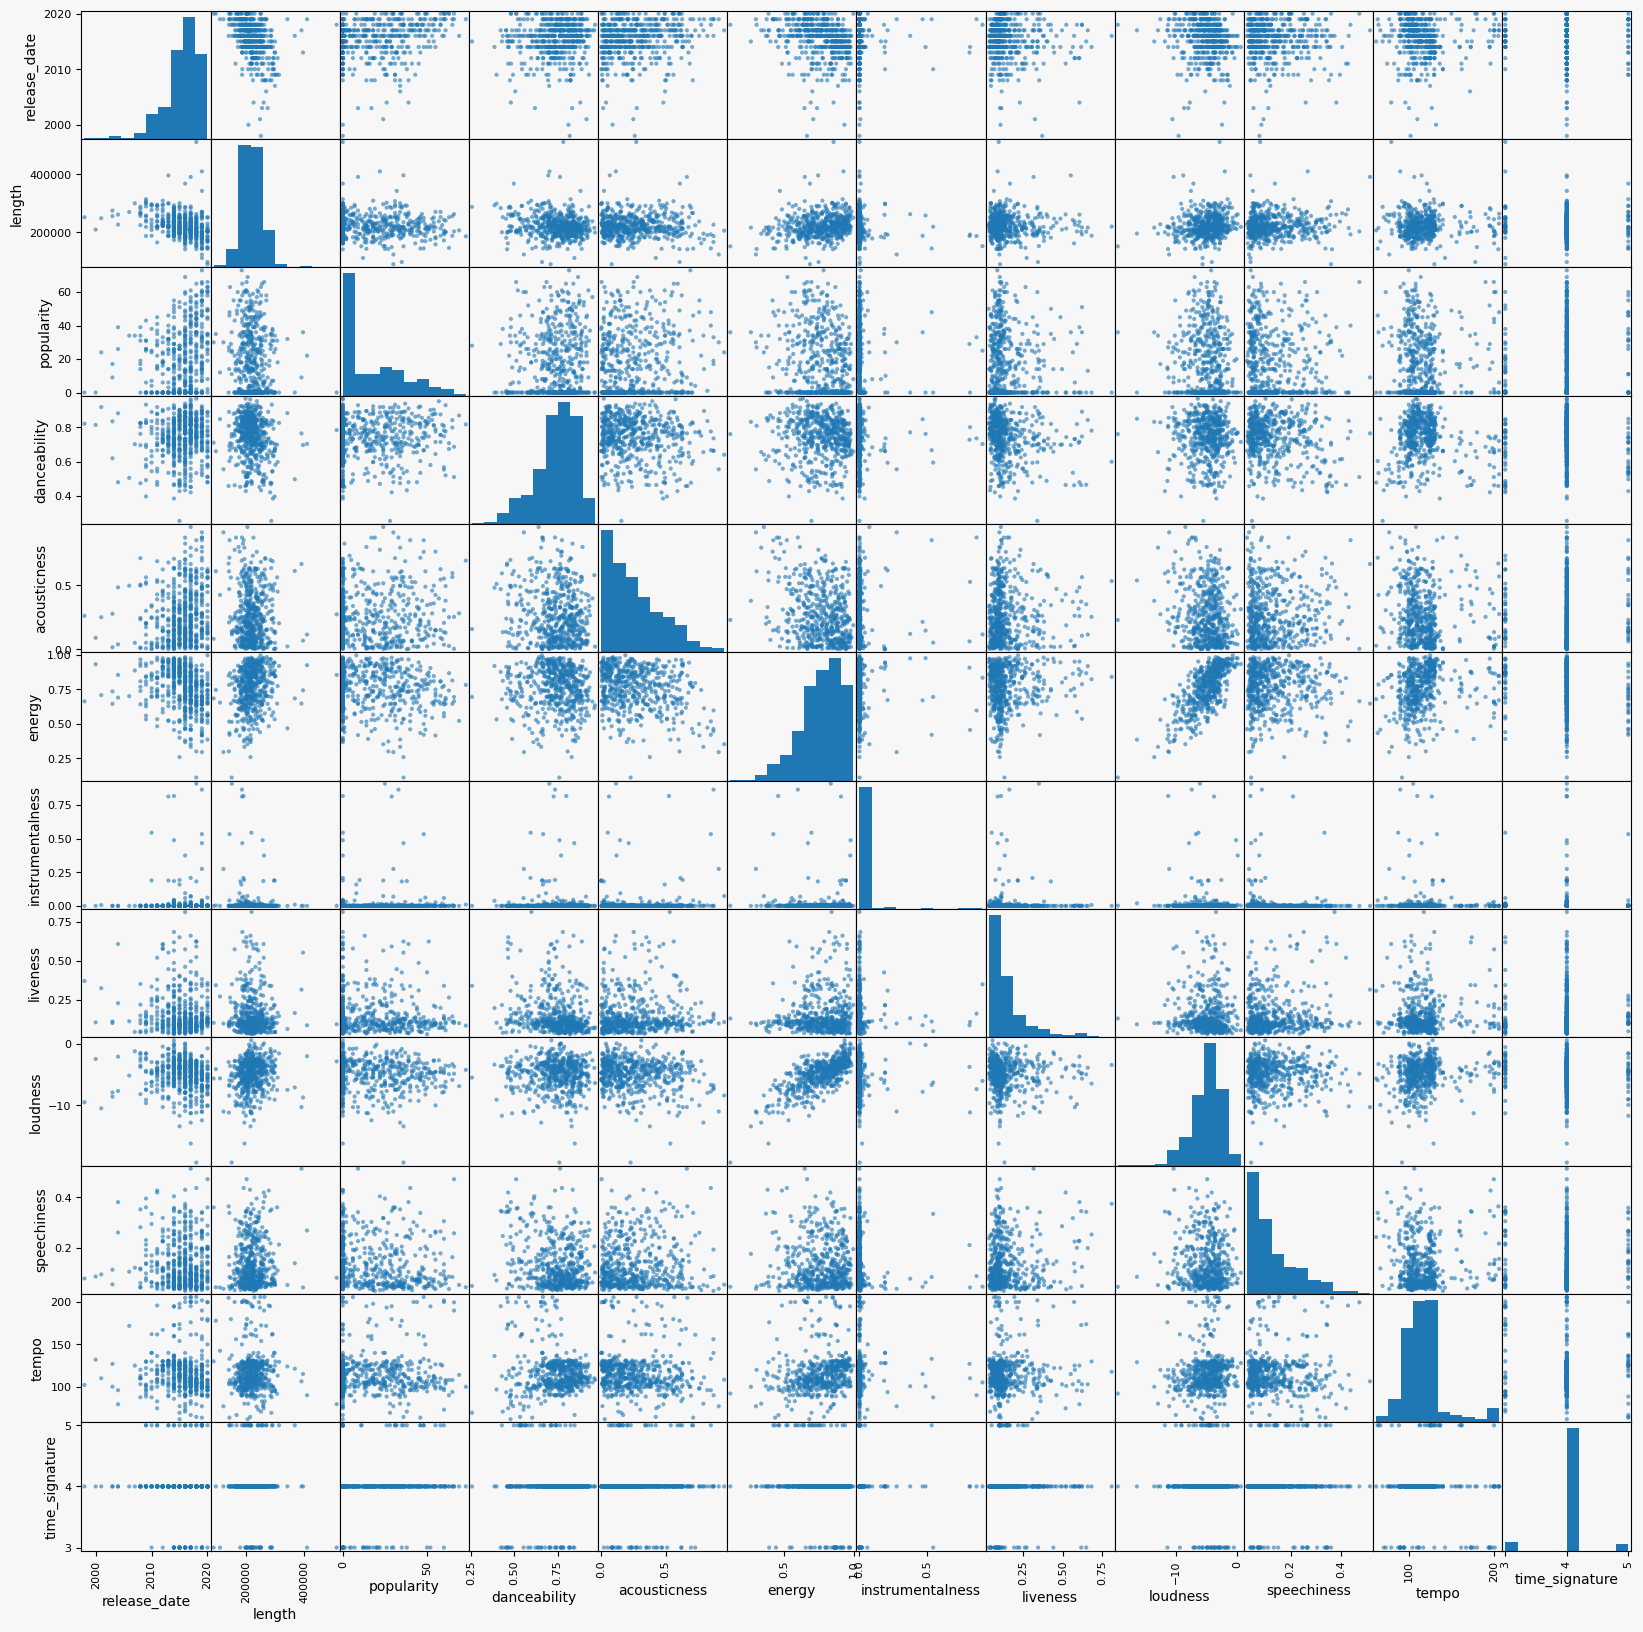

In [4]:
from pandas.plotting import scatter_matrix

_ = scatter_matrix(songs_df, alpha=0.6, figsize=(20, 20), diagonal='hist')

## Part One: Understanding Nonlinear Modeling

To introduce the issue of nonlinear modeling, let's consider the spotify dataset, focusing on the relationship between energy and loudness. The task we are embarking on for now is to predict the loudness (db) from the energy.

Text(0, 0.5, 'Loudness')

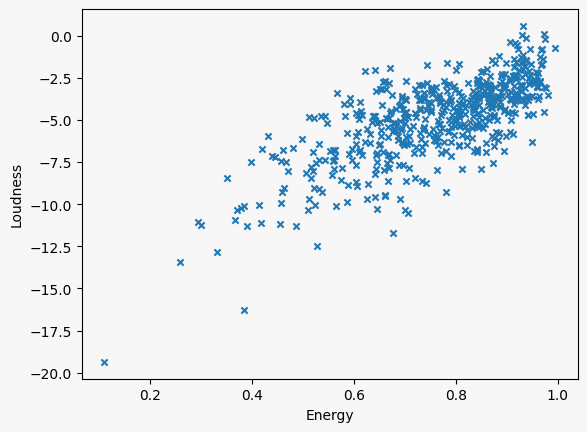

In [5]:
df = songs_df[["energy", "loudness"]]
df.plot(kind="scatter", x="energy", y="loudness", marker="x")
plt.xlabel("Energy")
plt.ylabel("Loudness")

We can observe that these two features have an approximately linear relationship i.e as the energy intensity increases, so does the overall loudness of the track. But is the relationship _really_ linear? 🤔

If we were to fit a linear model to this data, it would look like the following:

In [6]:
X = np.array([df["energy"].values, np.ones(len(df))])
X

array([[0.42 , 0.683, 0.564, ..., 0.864, 0.806, 0.961],
       [1.   , 1.   , 1.   , ..., 1.   , 1.   , 1.   ]])

In [7]:
X.shape

(2, 530)

In [8]:
X.T

array([[0.42 , 1.   ],
       [0.683, 1.   ],
       [0.564, 1.   ],
       ...,
       [0.864, 1.   ],
       [0.806, 1.   ],
       [0.961, 1.   ]])

In [9]:
X.T.shape

(530, 2)

(0.0, 1.0)

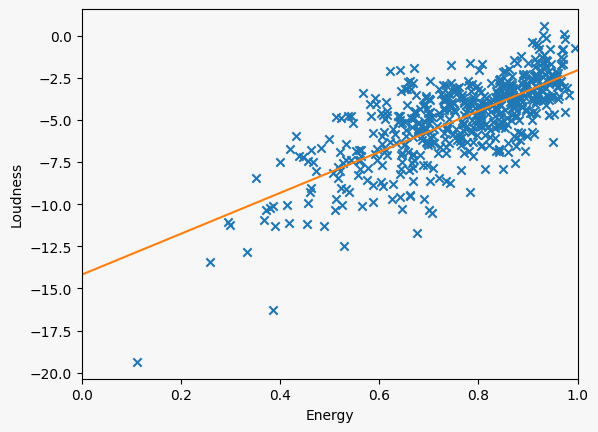

In [10]:
X = np.array([df["energy"].values, np.ones(len(df))]).T
y = df["loudness"].values

theta = np.linalg.solve(X.T @ X, X.T @ y)

plt.scatter(df["energy"], df["loudness"], marker="x")

plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.plot([0,1], [0*theta[0]+theta[1], 1*theta[0]+theta[1]], 'C1')
plt.xlim([0,1])

In [11]:
print(theta)

[ 12.13666613 -14.18443437]


In a very precise sense this *is* the best fit to the data: it is the line that minimizes the sum of squared errors between the data points and the points on the straight (fitted) line (remember the slide on "walking the straight line" from week 8). The hypothesis function $h_{\theta}(x) = \theta^Tx$ is given by:

$$h_{\theta}(x) = \theta_1\text{Energy}^{(i)} + \theta_0$$


However, this is not the *best* fit as it overestimates the loudness for energy level. To better capture the distribution of the data, we turn to techniques that can model non-linear relationship in the data. To do this, we build features that include non-linear functions of the underlying inputs. For example, we can formulate the equation

$$\begin{align}
    x^{(i)} &= \begin{bmatrix}
           (\text{Energy}^{(i)})^2 \\
           \text{Energy}^{(i)} \\
           1
         \end{bmatrix}
  \end{align}$$

where $x^{(i)}$ is a vector of the new set of features which now includes quadractic function of the Energy variable. $\theta^{(i)}$ are the model parameters we want to learn. If we choose this representation, then our linear hyporthesis function $h_{\theta}(x) = \theta^Tx$ is now given by

$$h_{\theta}(x) = \theta_1(\text{Energy}^{(i)})^2 + \theta_2\text{Energy}^{(i)} + \theta_0$$

This is a _quadratic_ function of the Energy feature. Importantly, however, the hypothesis function is still a linear function of the parameters, and so the exact same solution methods work as before (including the exact solution), just by passing a different feature matrix. Let's see how this works in practice.
<br><br>

**Normalization of the feature with Min-Max Rescaling approach**

We are going to normalize the features to the range [-1, +1] for numerical reasons. Note that for Energy feature that we are working with, it's already scaled but it's important to rescale if working with features whose values are very large because high polynomials get very large very quickly, and if we are not careful it is easy to overload the range of double precision floating point values.

You can also choose to min-max scale in the range of [-1, +1], instead of [0, 1]. The range that you choose may depend on the nature of your data.

$$
x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
$$

You can have a generic version of this formula that allows you to rescale a range of arbitrary set of values $[a, b]$.

$$
x' = a + \frac{\big(x - \text{min}(x)\big)\big(b-a\big)}{\text{max}(x) - \text{min}(x)}
$$


where $x$ is the original value, and $x'$ is the normalized value. $a$ and $b$ are the new min-max values.

**Least Squares Solution**
Once we have normalized the feature, we will use the exact least squares solution to find the best parameters (weight) for the problem.

$$
\theta = (X^TX)^{-1} X^Ty \\
x = a^{-1}b \\
ax = b
$$

The `np.linalg.solve` can be used to solve the linear matrix equation. Returns solution to $ax=b$ where in this case $a=X^TX$, $b=X^Ty$ and $x=\theta$

In [12]:
# @title [Run Me] Min-max rescaling implementation
def min_max(x, a=-1, b=1, verbose=False):
  min_x, max_x = x.min(), x.max()

  if verbose:
    print(f"Raw values: min(x)={min_x}, max(x): {max_x}")

  numerator = (x - min_x) * (b-a)
  denumerator = max_x - min_x

  x_prime = a + (numerator / denumerator)

  if verbose:
    print(f"Rescaled values: min(x_prime)={x_prime.min()}, max(x_prime): {x_prime.max()}")
  return x_prime

def inverse_min_max(x_prime, min_x=0.111, max_x=0.995, verbose=False):
  a, b = x_prime.min(), x_prime.max()

  if verbose:
    print(f"Rescaled values: min(x_prime)={a}, max(x_prime): {b}")

  numerator = (x_prime - a) * (max_x - min_x)
  denumerator = b - a

  x = (numerator / denumerator) + min_x


  if verbose:
    print(f"Raw values: min(x)={x.min()}, max(x): {x.max()}")
  return x


# Let's test that the functions work
x = df["energy"].values
assert np.allclose(x, inverse_min_max(min_max(x), min_x=x.min(), max_x=x.max()))

In [13]:
x.min(), max(x)

(0.111, 0.995)

In [14]:
x_prime = min_max(x, a=1000, b=100)
x_prime.min(), x_prime.max()

(100.0, 1000.0)

In [15]:
x[:1]

array([0.42])

In [16]:
degree = 2

# output = []
# for i in range(degree, -1, -1):
#   output.append(x[:1]**i)

[x[:1]**i for i in range(degree, -1,  -1)]

[array([0.1764]), array([0.42]), array([1.])]

In [17]:
songs_df["energy"].values.reshape([-1, 1])[:10]

array([[0.42 ],
       [0.683],
       [0.564],
       [0.611],
       [0.833],
       [0.525],
       [0.587],
       [0.3  ],
       [0.669],
       [0.295]])

In [18]:
degree = 10
np.array([x**i for i in range(degree, -1,  -1)]).T[:10]

array([[1.70801981e-04, 4.06671384e-04, 9.68265200e-04, 2.30539333e-03,
        5.48903174e-03, 1.30691232e-02, 3.11169600e-02, 7.40880000e-02,
        1.76400000e-01, 4.20000000e-01, 1.00000000e+00],
       [2.20905758e-02, 3.23434492e-02, 4.73549769e-02, 6.93337876e-02,
        1.01513598e-01, 1.48628987e-01, 2.17611987e-01, 3.18611987e-01,
        4.66489000e-01, 6.83000000e-01, 1.00000000e+00],
       [3.25679963e-03, 5.77446743e-03, 1.02384174e-02, 1.81532224e-02,
        3.21865645e-02, 5.70683768e-02, 1.01185065e-01, 1.79406144e-01,
        3.18096000e-01, 5.64000000e-01, 1.00000000e+00],
       [7.25123704e-03, 1.18678184e-02, 1.94235980e-02, 3.17898495e-02,
        5.20292136e-02, 8.51541957e-02, 1.39368569e-01, 2.28099131e-01,
        3.73321000e-01, 6.11000000e-01, 1.00000000e+00],
       [1.60860722e-01, 1.93110111e-01, 2.31824863e-01, 2.78301156e-01,
        3.34095025e-01, 4.01074460e-01, 4.81481944e-01, 5.78009537e-01,
        6.93889000e-01, 8.33000000e-01, 1.00000000e+

In [19]:
# Function to create polynomial feature
def poly_feat(x, degree, rescale=True):

  if rescale:
    # Rescale feature
    x = min_max(x)

  return np.array([x**i for i in range(degree, -1,  -1)]).T

# Least Squares Solution
def ls_poly(x, y, degree, rescale=True):
  X = poly_feat(x=x, degree=degree)
  return np.linalg.solve(X.T @ X, X.T @ y)

In [20]:
x = df["energy"].values
y = df["loudness"].values

min_x, max_x = x.min(), x.max()

print(ls_poly(x, y, degree=1))

[ 5.36440643 -7.472858  ]


In [21]:
print(theta)

[ 12.13666613 -14.18443437]


In [22]:
# mx+b
-1 *  5.36440643  + -7.472858

-12.83726443

In [23]:
min_x

0.111

In [24]:
min_x * 12.13666613 + -14.18443437

-12.83726442957

Now that we have computed the solution, let's plot it as before. Since our hypothesis is no longer a line, we can't plot it by simply specifying two points, but the rough procedure works the same as before.

In [25]:
def plot_regression_poly(theta):
    degree = len(theta)-1

    # Creates samples equally spaced between 0 and 1.
    xt0 = np.linspace(min_x-0.1, max_x+0.1, len(x))

    # Min-max normalization [-1, +1]
    xt = min_max(xt0)

    # Creates polynomial features
    Xt = np.array([xt**i for i in range(degree,-1,-1)]).T
    yt = Xt @ theta

    plt.scatter(x, y, marker="x", label="Observed data")
    ylim = plt.ylim()
    plt.plot(xt0, yt, 'C1', label="Squared loss fit")


    plt.xlabel("Energy")
    plt.ylabel("Loudness")
    plt.xlim([0, 1])
    plt.ylim(ylim)

    plt.title(f"Polynomial features of degree {degree}")

    plt.legend()

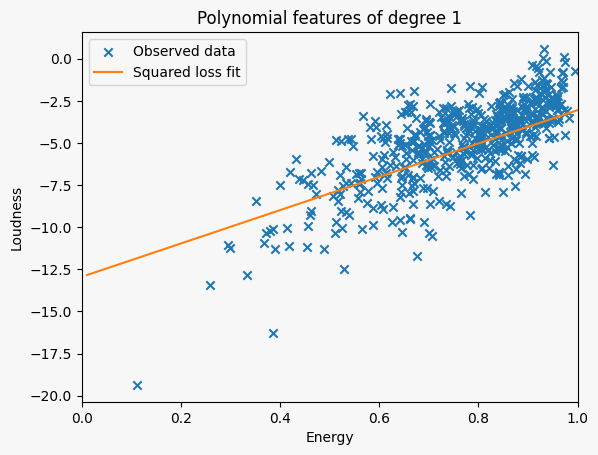

In [26]:
plot_regression_poly(ls_poly(x, y, degree=1))

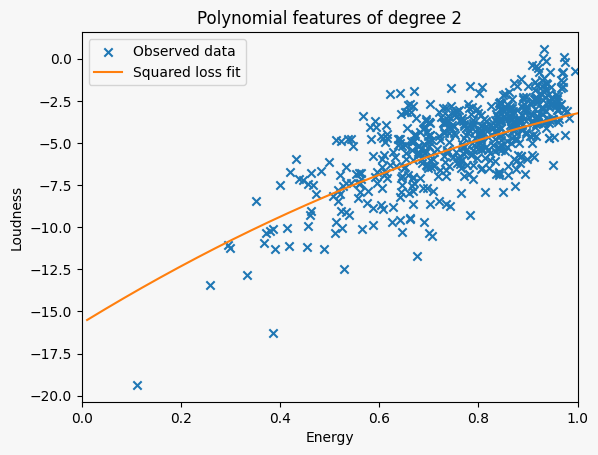

In [27]:
plot_regression_poly(ls_poly(x, y, degree=2))

This looks a little better than the linear model. Let's try higher polynomical degreess

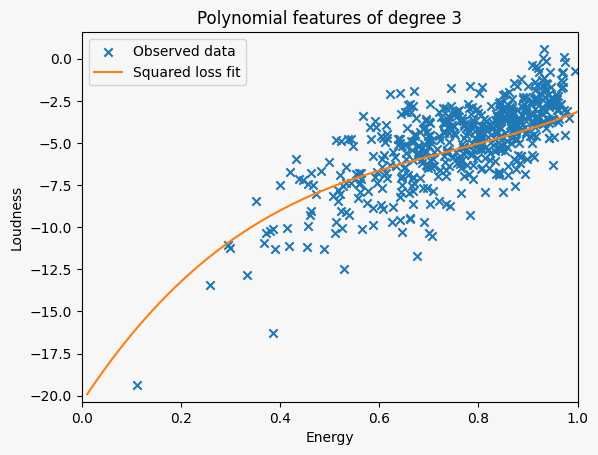

In [28]:
plot_regression_poly(ls_poly(x, y, degree=3))

This looks much better except in the higher energy. Maybe we try one more degree

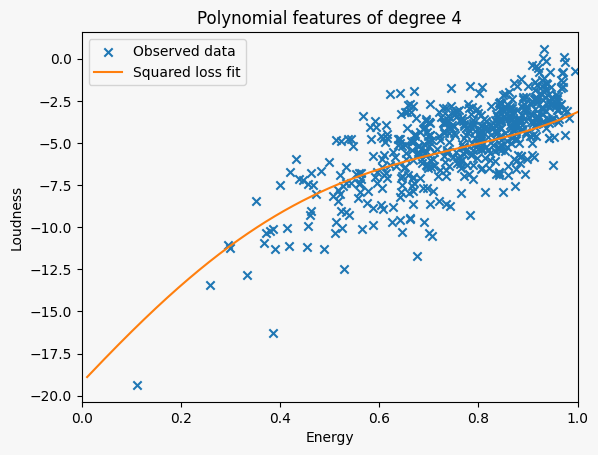

In [29]:
plot_regression_poly(ls_poly(x, y, degree=4))

This is starting to look like a pretty good fit to the data. Since so far, high degree has been better, so maybe we keep going. Let's try a degree of 5 polynomial.

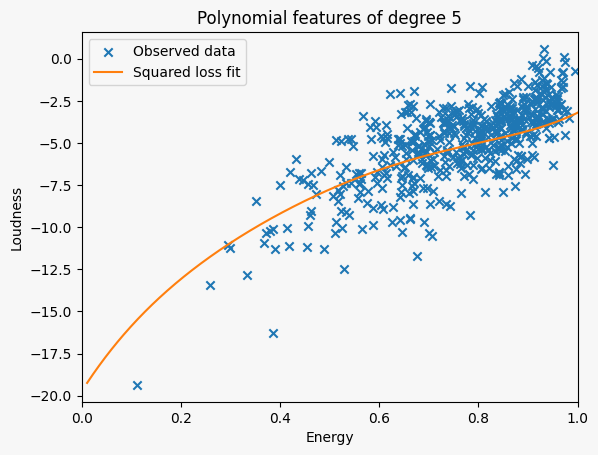

In [30]:
plot_regression_poly(ls_poly(x, y, degree=5))

How about degree 10

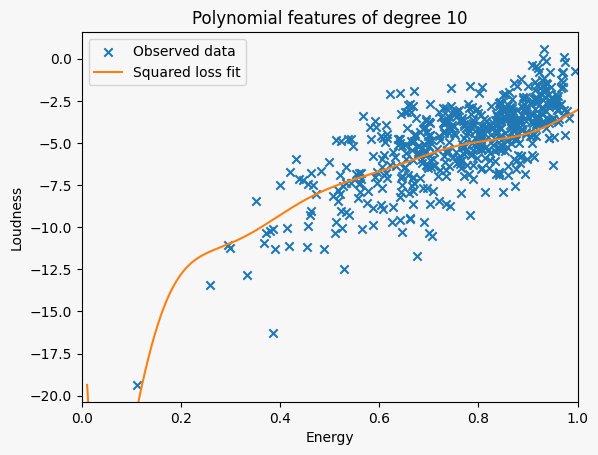

In [31]:
plot_regression_poly(ls_poly(x, y, degree=10))

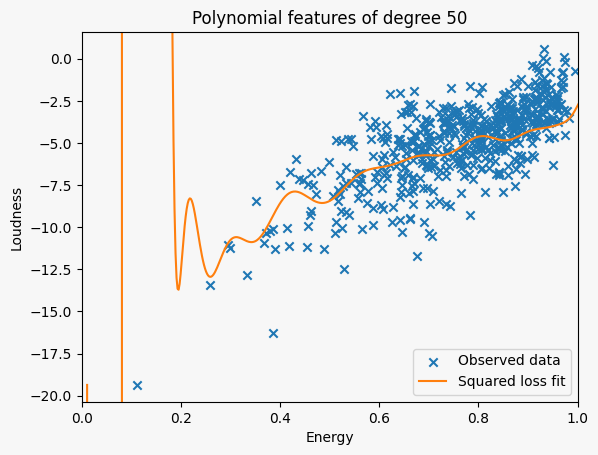

In [32]:
plot_regression_poly(ls_poly(x, y, degree=50))

Oh oh! looks like things are starting to look rather strange. Let's choose a even more drastic degree, 100.

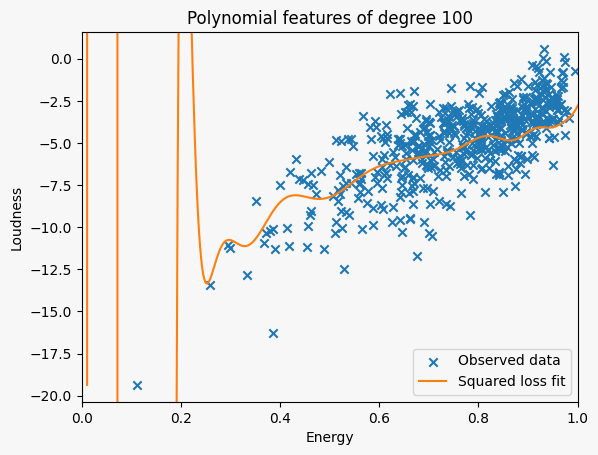

In [33]:
plot_regression_poly(ls_poly(x, y, degree=100))

Something very bad has happened at this point. Especially at the tail ends of the data where the datapoints are spaced less closely, we start to get very odd patterns for the data. But the important point is that this is actually a very good fit to the data from a least-squares perspective. As you can see from the figure, the lines pass _exactly_ through many of the data point (most obvioud on the left hand side of the plot) whereas for the "better" fit we had above, our function did not exactly pass through those points, so actually suffered more loss. The degree 100 polynomial fit, despite having _lower_ loss, is actually a worse approximimation of the underlying data. This brings us to the subject of Generalization and Overfitting.

### Generalization and Overfitting

Recall from our previous discussions that the canonical machine learning problem that we solve with every algorithm is the following

$$
\underset{\theta}{\text{minimize}} \frac{1}{m}\sum_{i=1}^m \ell \big(h_\theta (x^{(i)}, y^{(i)} \big)
$$


i.e to minimize the sum of losses on the dataset. However, in more fundamental way, this is not really our goal. We ultimately do not care about achieving low loss especially on the points that we are feeding into the algorithm: we already _know_ the true output for each of these datapoints, and if we want to "predict" these points precisely, we could just look up each point in a database (assuming we have some way of referring to the points uniquely). What we _really_ want from a machine learning algorithm is the ability to predict well on _new_ datapoints of the _same_ type as those we learned our model on. We don't care about knowing what the loudness score was for the tracks we have already seen; we care about being able to predict what the loudness score (roughly) would be for a track that we know how energetic it is but do not know how loud it could be.

**Generalization error** This discussion leads us to the notion of _generalization error_. Informally, the generalization error is just the error (or more generally, the loss) we would experience not on the training data itself, but on new data drawn from the "same distribution" as the training data. _This_ is really the quantity we want to minimize, not the error on the training data itself. Because when we run our machine learning algorithm on a new data, all that will matter is its generalization performance.

What the above example illustrated was an instance of _overfitting_, the situation where the training error is low, but the generalization error is high. This occurs because we are explicitly trying to minimize the loss on the training set, and if the expressiveness of the hypothesis function is small enough, then we can make this loss arbitrarily small, usually by fitting to pecularities in the training data that provides no real benefit when looking at new data.

**Overfitting in least squares** As a simple example, let's consider the case of least squares regression, when we choose the number of features $n$ to be the same as the number of examples $m$ (for example, we could achieve this by choosing a very high degree polynomial); let's also asume that the underlying data is distinct for each datapoint, we will imply (we won't worry about proving this formally, you can just take it as a fact) that the features for each example is linearly independent. Then we can look at our least squares solution

\begin{align}
\theta &= (X^TX)^{-1}X^Ty \\
       &= X^{-1}X^{-T}X^Ty \\
       &= X^{-1}y
\end{align}
(where the assumption about linear independence implies that $X$ is invertible, and we use the property that $(AB)^{-1} = B^{-1}A^{-1}$ when $A$ and $B$ are invertible) and we therefore have $X\theta=y$ i.e the predictions on the training set are perfect. However, unless the model was exactly captured by $m$ points, there would be no reason to expect that the resulting fit would generalize well to new points.

**Overfitting and model complexity**
When model complexity is low, both training and generalization loss are high (here mdoel complexity can mean any type of representational power of the model, but since we have covered this so far, you can think of it just as the degree of the polynomial in our feature vector). As we increase model complexity, both the training and generalization performance start to decrease with training loss usually slightly lower than generalization loss (due to the simple fact that we explicitly optimized training loss). As we further increase model complexity, training loss will continue to decrease i.e by adding additional representational power to our model, we will only fit the data better and better, since we are explicitly choosing parameters to minimize this loss. But at a certain point, generalization loss will start to increase again. Our goal when choosing the "right" model for a particular machine learning problem is to find the model with lowerst generalization error, the minimum in the red line above. However, we cannot do so using the training set alone, because performance on the training set (the blue line), gives us no clue at to the performance of the generalization loss.


### Train-Test (Holdout) split
This is also known as cross-validation. The fundamental idea we are going to use here is simple enough that you have likely already thought of how to do this, even if you have not seen the process before. Although we cannot easily have access to the _true_ generalization loss (this is an expectation over the true underlying distribution of data, as we will define shortly). However, we can easily obtain a reasonable approximation to it by a procedure called cross validation.


The idea of cross validation is simple. GIven the entirety of our training data, we take some fixed percentage, say 70% of the data, and call this our "new" training set. We then take the remaining data (30% in this case), and call it the _holdout_ or _test_ set. The basic idea is that we will use this _test_ set to estimate the empirical error or loss thereby approximating the generalization error. This works because, unlike the training set, we do _not_ choose the parameters of the model based upon the validation set. This means that there is no way for the parameters to overfit to this data, and thus the validation set still provides a reasonable estimate of generalization error even _after_ the parameters have been trained.

Let's see how to generate these training and validation sets.


In [34]:
len(songs_df["energy"]) * 0.7

371.0

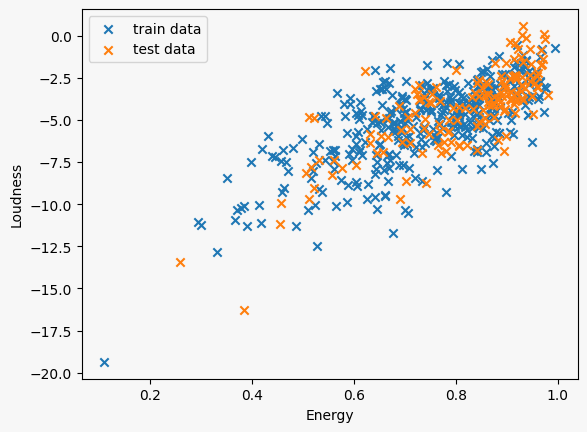

In [35]:

x_train, y_train = songs_df["energy"].iloc[:371].values, df["loudness"].iloc[:371].values
x_test, y_test = songs_df["energy"].iloc[371:].values, df["loudness"].iloc[371:].values

plt.scatter(x_train, y_train, marker="x", color="C0", label="train data")
plt.scatter(x_test, y_test, marker="x", color="C1", label="test data")
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.legend()

In [36]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
np.random.seed(42)
np.random.permutation(10)

array([8, 1, 5, 0, 7, 2, 9, 4, 3, 6])

In [38]:
np.random.seed(42)
perm = np.random.permutation(X.shape[0])

idx_train = perm[:int(len(perm) * 0.7)]
idx_test = perm[int(len(perm) * 0.7):]

x_train, y_train = songs_df["energy"].iloc[idx_train].values, df["loudness"].iloc[idx_train].values
x_test, y_test = songs_df["energy"].iloc[idx_test].values, df["loudness"].iloc[idx_test].values

In [39]:
idx_train[:5]

array([140, 398,   6, 334, 322])

In [40]:
songs_df["energy"].iloc[idx_train]

140    0.935
398    0.891
6      0.587
334    0.587
322    0.868
       ...  
399    0.737
351    0.399
407    0.950
178    0.944
41     0.543
Name: energy, Length: 371, dtype: float64

In [41]:
print(len(idx_train), len(idx_test))

371 159


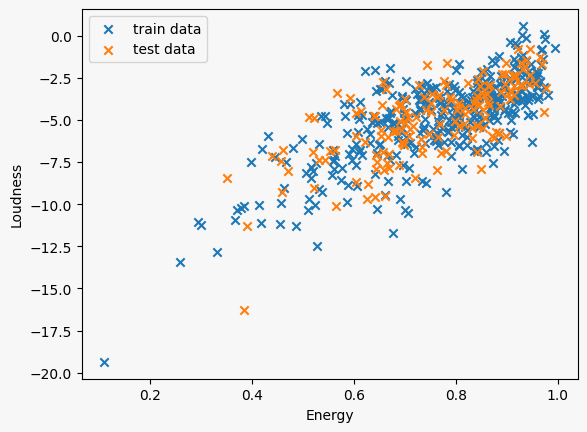

In [42]:
plt.scatter(x_train, y_train, marker="x", color="C0", label="train data")
plt.scatter(x_test, y_test, marker="x", color="C1", label="test data")
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.legend()

Now let's generate features for the training and test sets. The standard procedure here is that we should compute all feature normalization based upon the **training** alone, and only afterwards apply the same normalization to the test set. Note that in some cases it is permissable to include test datapoints (obviously not the labels) into the normalization process (namely if you expect to have similar access to all the "unlabelled" data you will be evaluating the system on prior to training the system), but it is much more standard to simply use just the new training set for everything, including normalization.

In [43]:
def mse(y_pred, y_true):
  error = y_pred - y_true
  return (error**2).mean()

$$
\theta^T \cdot X \\
h_\theta = X \cdot \theta
$$

In [44]:
# Least Squares Solution
def ls_poly(x, y, degree, rescale=True):
  X = poly_feat(x=x, degree=degree)
  return np.linalg.solve(X.T @ X, X.T @ y)
  # return np.linalg.pinv(X.T @ X) @ (X.T @ y)

Text(0, 0.5, 'Mean squared error')

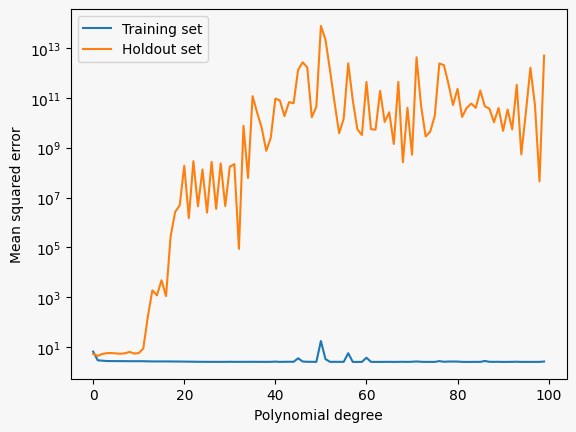

In [45]:
err_train = []
err_test = []

n = 100

for i in range(n):
  theta = ls_poly(x_train, y_train, i)

  #
  train_pred = poly_feat(x_train, i, rescale=True) @ theta
  test_pred = poly_feat(x_test, i, rescale=True) @ theta

  err_train.append(mse(y_pred=train_pred, y_true=y_train))
  err_test.append(mse(y_pred=test_pred, y_true=y_test))


plt.semilogy(range(n), err_train, range(n), err_test)
plt.legend(["Training set", "Holdout set"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

Text(0, 0.5, 'Mean squared error')

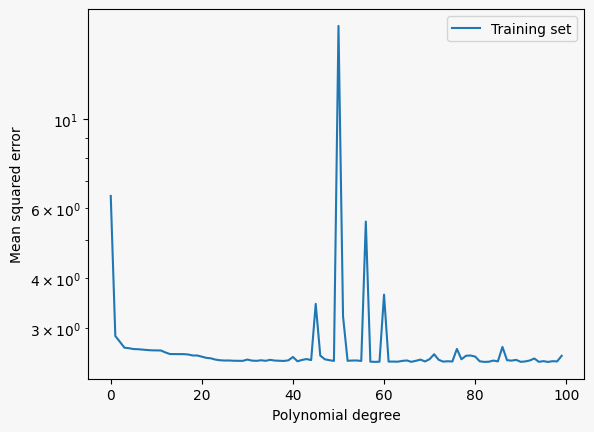

In [46]:
plt.semilogy(range(n), err_train)
plt.legend(["Training set", "Holdout set"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

Don't worry about the little increases in training loss: these results from numerical instabilities that occur a you have polynomical that are of high degrees (simply put, at this range, the numerical accuracy of double precision is not high enough). But the point here is hopefully clear, that as model complexity increseas, the training error decreases (modulo numerical stability), while holdout set error can increase greatly (notice we are using log scale for the plot). But it is also worth emphasizing that this is not a monotonic process: again due to pecularities in the data, the holdout set error can jump around significantly. You want to pay more attention to the general trend instead of any particular value of the loss.

So which model is the "best" fit to the data? This is a somewhat subjective question, since it likely involves some combination of a model with low holdout error and some subjective notion about preferring "simpler" models all else equal. Let's look more closely at the range of the loss.

Text(0, 0.5, 'Mean squared error')

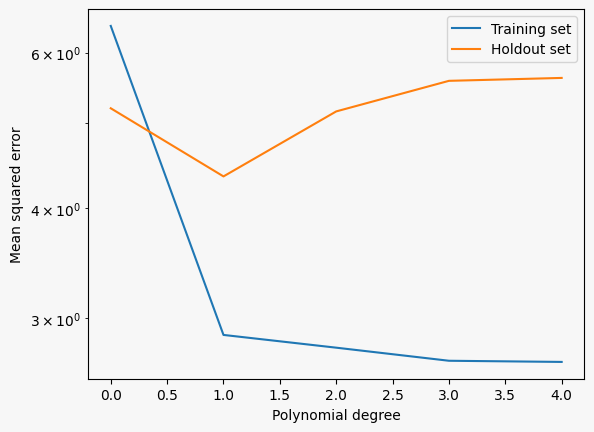

In [47]:
plt.semilogy(range(5), err_train[:5], range(5), err_test[:5])
plt.legend(["Training set", "Holdout set"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

In [48]:
err_test[:5]

[5.189557252824375,
 4.343897495964101,
 5.147273155921728,
 5.5750373669639,
 5.617579941867952]

Looking at the plot, maybe a polynomial degree of 1 (linear model) is indeed the best fit for this data 😉.

Let's also look at the actual weights involves with this fit

In [49]:
theta = ls_poly(x, y, 100)
print(theta[:4])

[-11448907.81730621   2730733.232386   -14276329.51891163
  31266820.69176741]


$$
\theta = (X^TX + \lambda I)^{-1}X^Ty
$$

$$
\begin{bmatrix}
1 ~~ 0 ~~ 0 \\
0 ~~ 1 ~~ 0 \\
0 ~~ 0 ~~ 1
\end{bmatrix}
$$

In [50]:
np.eye(3) * 10

array([[10.,  0.,  0.],
       [ 0., 10.,  0.],
       [ 0.,  0., 10.]])

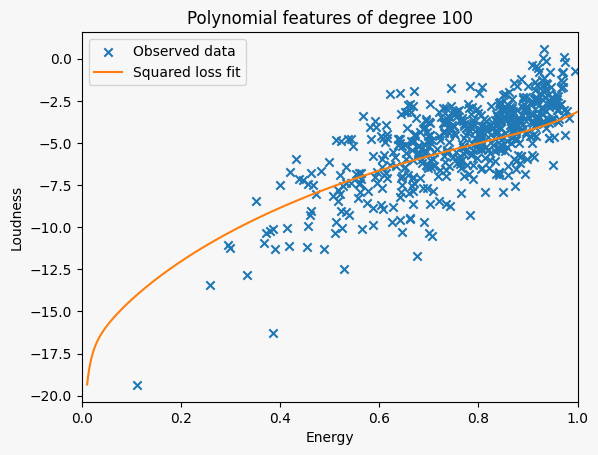

In [51]:
def ls_poly_reg(x, y, lam, degree):
  X = poly_feat(x, degree=degree, rescale=True)
  return np.linalg.solve(X.T @ X + lam * np.eye(X.shape[1]), X.T @ y)

theta = ls_poly_reg(x, y, 1.0, 100)
plot_regression_poly(theta)

In [52]:
print(theta[:5])

[0.07003205 0.11998898 0.06714826 0.11705601 0.06416649]


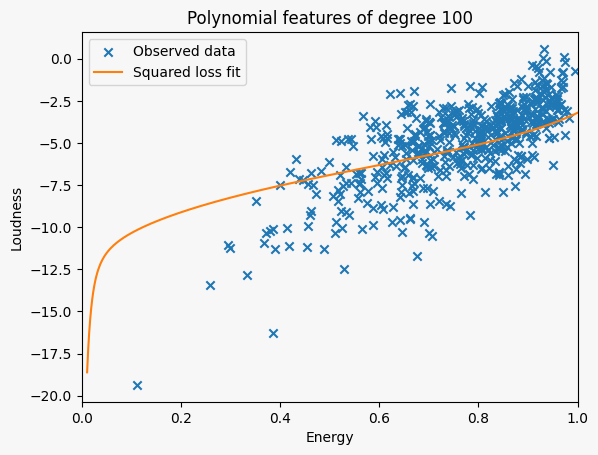

In [53]:
theta = ls_poly_reg(x, y, 10.0, 100)
plot_regression_poly(theta)

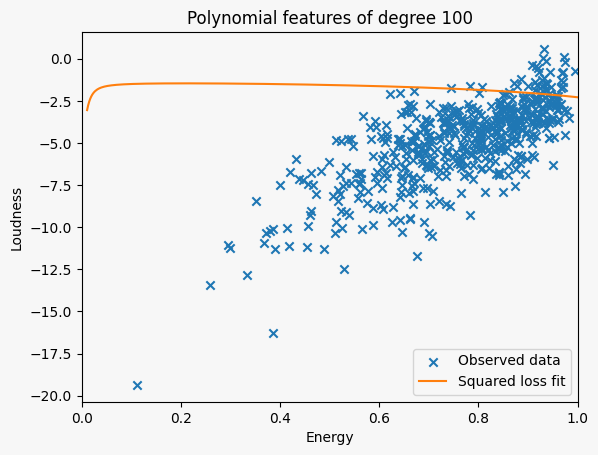

In [54]:
theta = ls_poly_reg(x, y, 1000.0, 100)
plot_regression_poly(theta)

Text(0.5, 1.0, 'Non-Regularized')

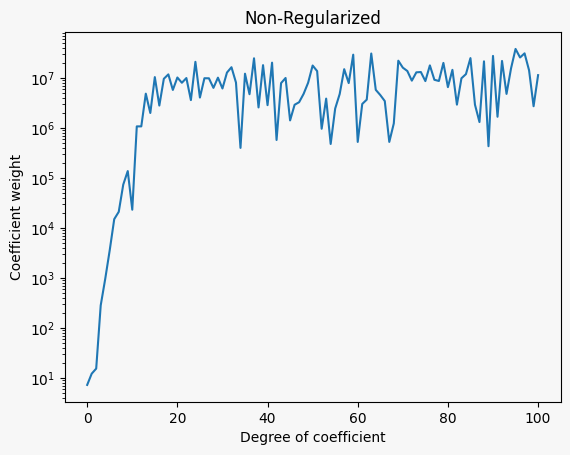

In [55]:
theta = ls_poly(x, y, 100, rescale=True)
plt.semilogy(range(101), np.abs(theta[::-1]))
plt.xlabel("Degree of coefficient")
plt.ylabel("Coefficient weight")
plt.title("Non-Regularized")

Text(0.5, 1.0, 'Regularized')

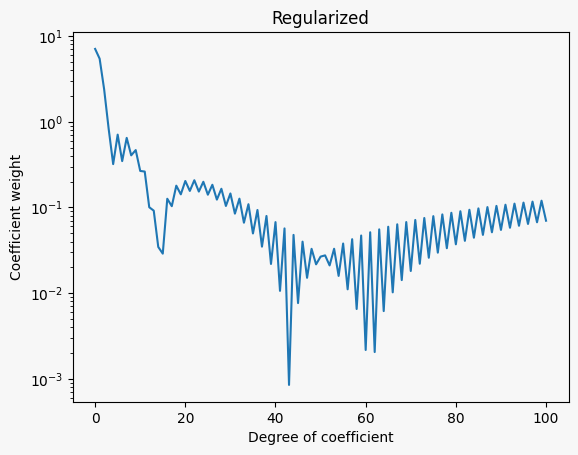

In [56]:
theta = ls_poly_reg(x, y, 1, 100)
plt.semilogy(range(101), np.abs(theta[::-1]))
plt.xlabel("Degree of coefficient")
plt.ylabel("Coefficient weight")
plt.title("Regularized")

Text(0, 0.5, 'Average squared loss')

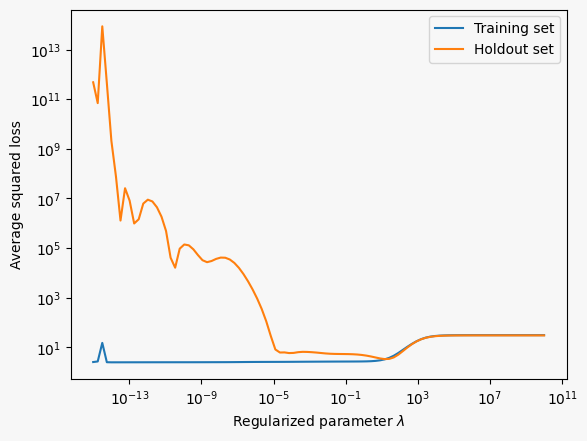

In [57]:
lam = np.logspace(-15, 10, 100)
phi_train = poly_feat(x_train, 100)
phi_test = poly_feat(x_test, 100)
err_train = [mse(y_pred=phi_train @ ls_poly_reg(x_train, y_train, l, 100), y_true=y_train) for l in lam]
err_test = [mse(y_pred=phi_test @ ls_poly_reg(x_train, y_train, l, 100), y_true=y_test) for l in lam]

plt.loglog(lam, err_train, lam, err_test)
plt.legend(["Training set", "Holdout set"])
plt.xlabel("Regularized parameter $\lambda$")
plt.ylabel("Average squared loss")

### Radial Basis Functions

Text(0.5, 0, '$x$')

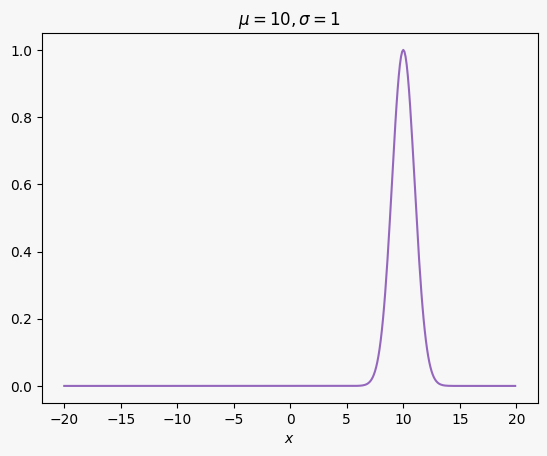

In [58]:
def rbf_feat(x, mu, sig):
  return np.exp(-(x - mu) ** 2 / (2 * sig ** 2))

r = [rbf_feat(i, 10, 1) for i in np.arange(-20, 20, 0.1)]
plt.plot(np.arange(-20, 20, 0.1), r, c="C4")

plt.title(r"$\mu=10, \sigma=1$")
plt.xlabel(r"$x$")
# plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


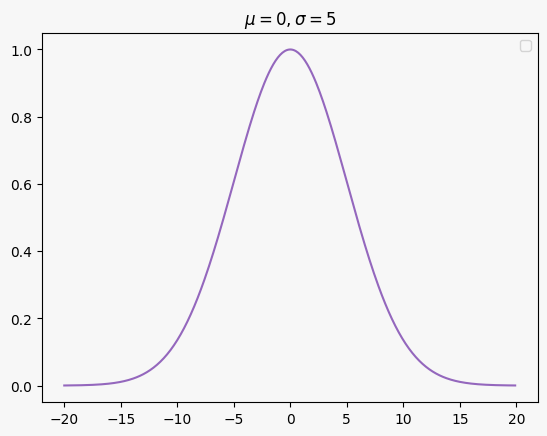

In [59]:
r = [rbf_feat(i, 0, 5) for i in np.arange(-20, 20, 0.1)]
plt.plot(np.arange(-20, 20, 0.1), r,  c="C4")
plt.title(r"$\mu=0, \sigma=5$")
plt.legend()

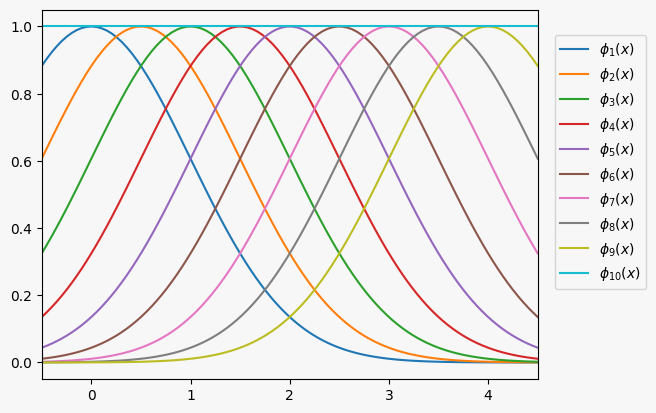

In [60]:
x = np.linspace(-0.5,4.5,100)
mu = np.linspace(0,4,9)
sigma = 1.0
for mu_ in mu:
    plt.plot(x, np.exp(-(x-mu_)**2 / (2*sigma**2)))
plt.plot([-0.5,4.5], [1,1])
plt.xlim([-0.5,4.5])
plt.legend([r"$\phi_{" + str(j+1) + "}(x)$" for j in range(10)], bbox_to_anchor=(1.02,0.95))

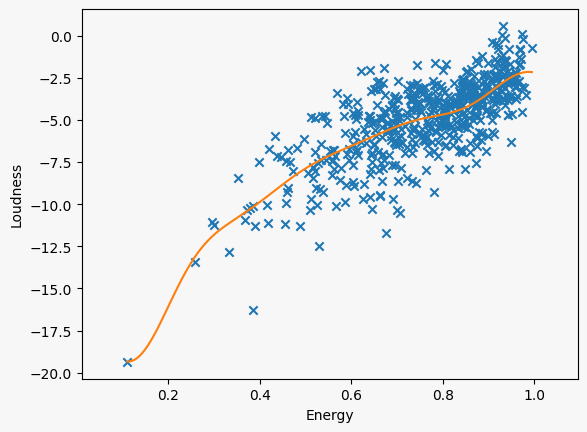

In [61]:
def rbf_feat(x, mu, sig):
  return np.hstack([np.exp(-(x[:, None] - mu) ** 2 / (2 * sig ** 2)), np.ones((len(x), 1))])

def plot_regression_rbf(theta, mu, sig):
  xt = np.linspace(x.min(), x.max(), len(x))
  yt = rbf_feat(xt, mu, sig) @ theta

  plt.scatter(x, y, marker="x")
  ylim = plt.ylim()
  plt.plot(xt, yt, 'C1')
  plt.xlabel("Energy")
  plt.ylabel("Loudness")
  plt.xlim([x.min()-0.1, x.max()+0.1])
  plt.ylim(ylim)

def train_rbf(x, y, n_rbf):
  min_x, max_x = x.min(), x.max()
  sig = (max_x - min_x) / (n_rbf - 1)
  mu = np.linspace(min_x, max_x, n_rbf-1)

  Phi = rbf_feat(x, mu, sig)
  theta = np.linalg.solve(Phi.T @ Phi, Phi.T @ y)
  return theta, mu, sig

x = df["energy"].values
plot_regression_rbf(*train_rbf(x, y, 10))


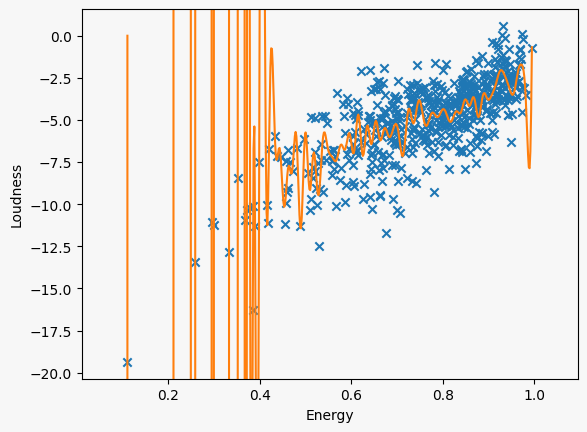

In [62]:
plot_regression_rbf(*train_rbf(x, y, 100))

### K-fold Cross Validation

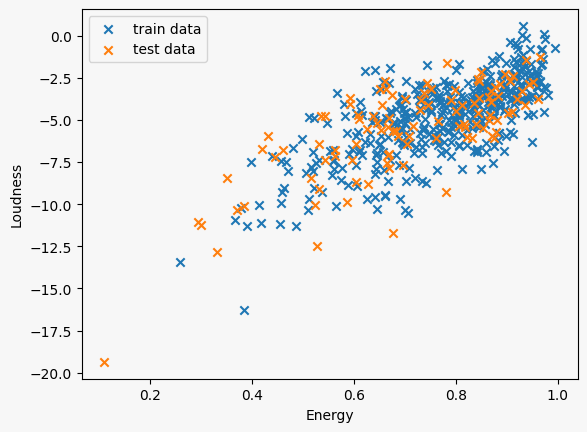

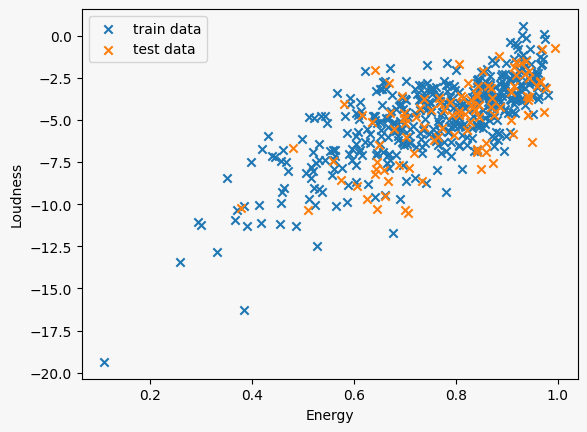

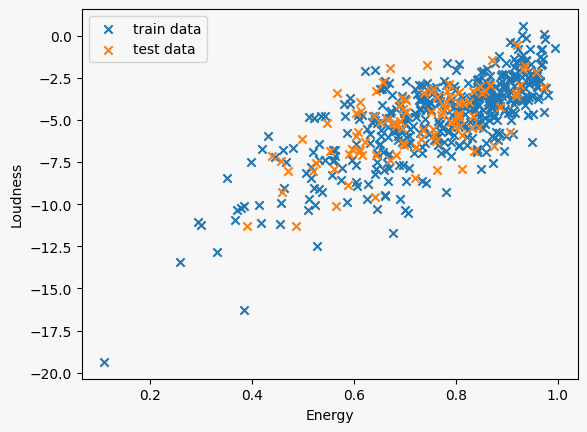

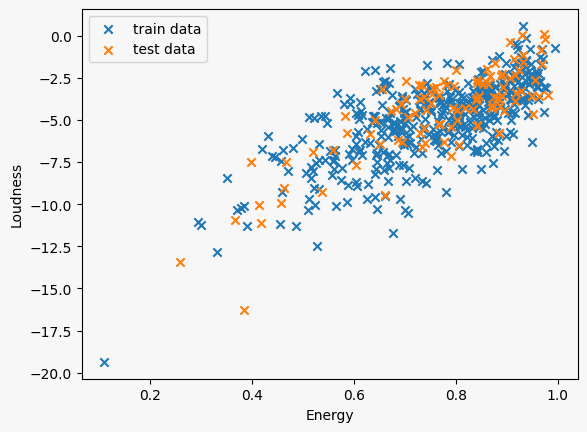

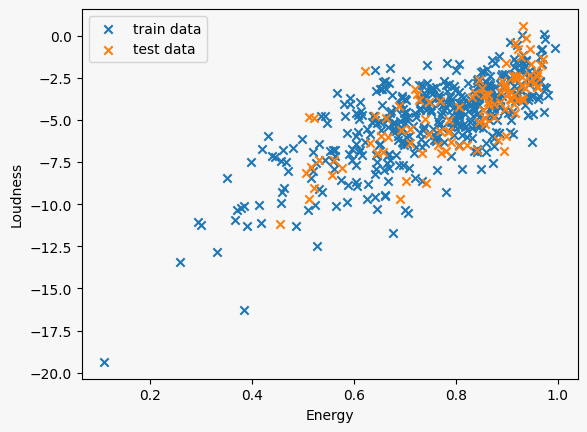

In [63]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

err_train = []
err_test = []

n = 3

for idx_train, idx_test in kf.split(x):
  x_train, y_train = songs_df["energy"].iloc[idx_train].values, df["loudness"].iloc[idx_train].values
  x_test, y_test = songs_df["energy"].iloc[idx_test].values, df["loudness"].iloc[idx_test].values

  theta = ls_poly(x_train, y_train, n)

  train_pred = poly_feat(x_train, n, rescale=True) @ theta
  test_pred = poly_feat(x_test, n, rescale=True) @ theta

  err_train.append(mse(y_pred=train_pred, y_true=y_train))
  err_test.append(mse(y_pred=test_pred, y_true=y_test))

  plt.scatter(x_train, y_train, marker="x", color="C0", label="train data")
  plt.scatter(x_test, y_test, marker="x", color="C1", label="test data")
  plt.xlabel("Energy")
  plt.ylabel("Loudness")
  plt.legend()
  plt.show()



<Axes: >

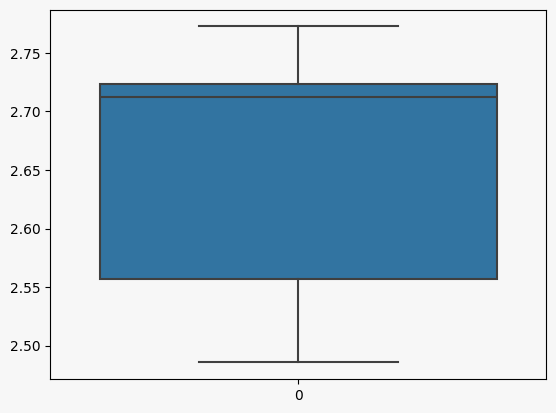

In [64]:
sns.boxplot(err_train)

<Axes: >

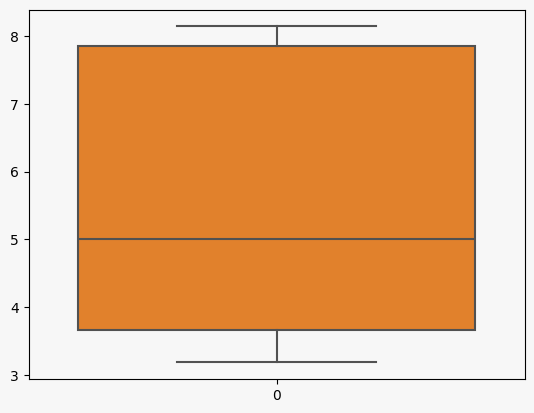

In [65]:
sns.boxplot(err_test, color="C1")

## Part Two: Predictive Feature Engineering

Our task in this section is to predict the popularity score using features from the dataset.

In [66]:
songs_df.head(1)

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.851,0.42,0.534,0.11,-6.699,0.0829,133.015,5


In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

def ridge_regression(df, features, label, split=0.7):
    """Runs Ridge Regression model. Assumes input features and target label are numerical"""
    np.random.seed(42)
    perm = np.random.permutation(df.shape[0])
    idx_train = perm[:int(len(perm) * split)]
    idx_test = perm[int(len(perm) * split):]


    x_train, y_train = songs_df[features].iloc[idx_train].values, songs_df[label].iloc[idx_train].values
    x_test, y_test = songs_df[features].iloc[idx_test].values, songs_df[label].iloc[idx_test].values

    print(f"train_size: {len(x_train)}\ntest_size: {len(x_test)}")

    # scale the input features
    minmax = MinMaxScaler().fit(x_train)
    x_train = minmax.transform(x_train)
    x_test = minmax.transform(x_test)

    model = Ridge(alpha=1.0)
    model.fit(x_train, y_train)
    return model, x_train, y_train, x_test, y_test


In [68]:
# using two features
features = ["energy", "liveness"] 

# predict popularity
label = ["popularity"]
model, x_train, y_train, x_test, y_test = ridge_regression(df=songs_df, features=features, label=label, split=0.7)

print(f"Train ERROR: {mean_squared_error(model.predict(x_train), y_train)}")
print(f"Test ERROR: {mean_squared_error(model.predict(x_test), y_test)}")

train_size: 371
test_size: 159
Train ERROR: 352.5462976277285
Test ERROR: 339.34066702844814


In [69]:
pd.DataFrame([y_train.squeeze(), model.predict(x_train).squeeze()], index=["label", "prediction"]).T

,label,prediction
0,26.0,13.777606
1,1.0,15.214654
2,29.0,19.155555
3,11.0,21.504549
4,0.0,15.579617
...,...,...
366,0.0,18.509392
367,0.0,25.760273
368,0.0,11.223305
369,45.0,11.954008


Can you make it better?

### Augmenting the Spotify Music Dataset

In [70]:
import requests
from bs4 import BeautifulSoup
from functools import reduce
url = "https://www.top-charts.com/songs/all-genres/nigeria/total"
response = requests.get(url)

assert response.status_code == 200, 'failed'

# Scrape website with BS
soup = BeautifulSoup(response.content, "html.parser")

# Extract top 100 artists name
top_artists = []

divs = soup.find_all("div")
for el in divs:
  if el.get("id") == "Artist":
    top_artists.append(el.text)


# Handle output with more than one artists
top_artists = [i.split(",\xa0 ") for i in top_artists]

# Flatten the lists
top_artists = list(reduce(lambda x, y: x+y, top_artists))

# Remove duplicates
top_artists = list(set(top_artists))

print(len(top_artists))

top_artists = [i.lower() for i in top_artists]

songs_df["top100"] = songs_df.artist.apply(lambda x: 1 if x.lower().split(" ")[0] in top_artists else 0)

/Users/tejumadeafonja/.env/ai6lagos/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


89


In [71]:
# using three features
features = ["energy", "liveness", "top100"] 

# predict popularity
label = ["popularity"]
model, x_train, y_train, x_test, y_test = ridge_regression(df=songs_df, features=features, label=label, split=0.7)

print(f"Train ERROR: {mean_squared_error(model.predict(x_train), y_train)}")
print(f"Test ERROR: {mean_squared_error(model.predict(x_test), y_test)}")

train_size: 371
test_size: 159
Train ERROR: 324.9571921571361
Test ERROR: 322.38008966545925


In [72]:
pd.DataFrame([y_train.squeeze(), model.predict(x_train).squeeze()], index=["label", "prediction"]).T

,label,prediction
0,26.0,11.711104
1,1.0,12.984591
2,29.0,18.360815
3,11.0,19.703419
4,0.0,13.429528
...,...,...
366,0.0,16.450171
367,0.0,24.067631
368,0.0,10.097022
369,45.0,26.284349


We've been able to reduce both the train and test error

Can you make it better?

# [Unrelated] Slide Presentation Artifacts

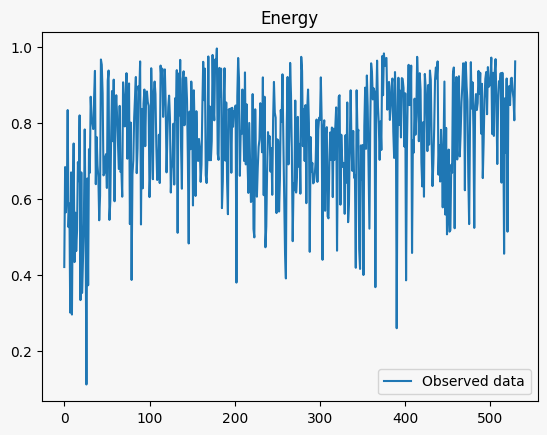

In [73]:
# Plot the energy data for each sample one after the other as ordered in the original dataset.
songs_df.energy.plot(label="Observed data")
plt.title("Energy")
plt.legend()


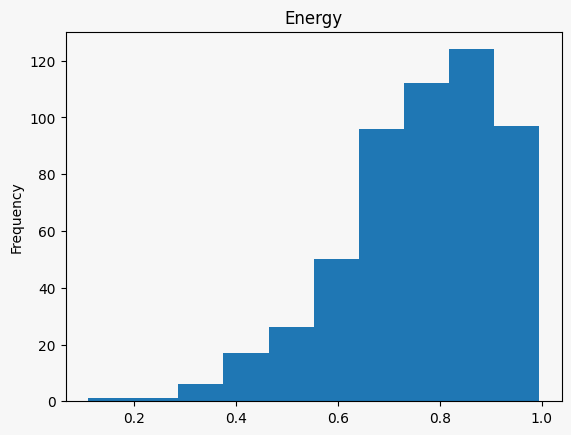

In [74]:
# Now plot the histogram distribution for the energy column
songs_df.energy.plot(kind="hist")
plt.title("Energy")
plt.show()

Text(0.5, 1.0, 'Energy')

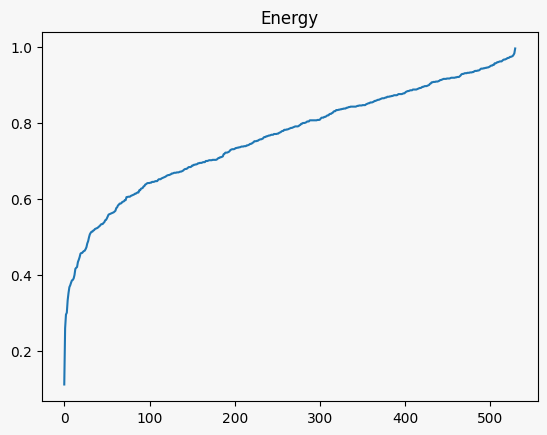

In [75]:

# Sort the column, and plot the data as in (1).
# This would show from low-high values like a cumulative plot but this is not a cumulative plot.
plt.plot(np.arange(songs_df.shape[0]), songs_df.energy.sort_values().values)
plt.title("Energy")

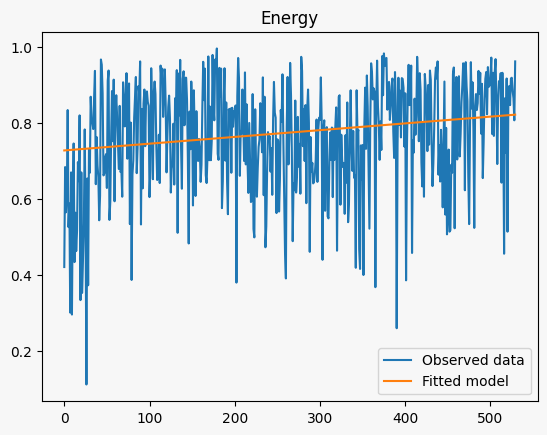

In [76]:
from sklearn.svm import SVR

# Fit a machine learning model on the energy data inorder
# to predict the energy value for new sample
X = np.arange(len(songs_df)).reshape(-1, 1)
y = songs_df.energy.values

# Fit linear kernel on the dataset. This is a bit slow.
svr = SVR(kernel="linear")
svr.fit(X, y)

# Plot the dataset
songs_df.energy.plot(label="Observed data")
plt.title("Energy")

# Plot the predicted values for the same X values that was trained with.
plt.plot(X, svr.predict(X), 'C1', label="Fitted model")

plt.legend()

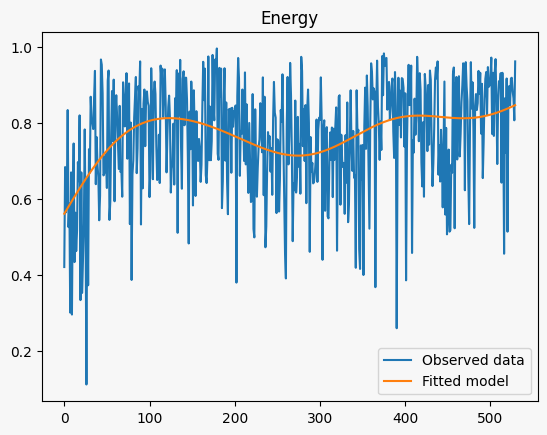

In [77]:
# Do the same as above but with a non-linear kernel
svr = SVR(kernel="rbf")

X = np.arange(len(songs_df)).reshape(-1, 1)
y = songs_df.energy.values
svr.fit(X, y)


songs_df.energy.plot(label="Observed data")
plt.title("Energy")
plt.plot(X, svr.predict(X), 'C1', label="Fitted model")

plt.legend()

**References:**

[1] [Country-wise visual analysis of music taste using Spotify API](https://towardsdatascience.com/country-wise-visual-analysis-of-music-taste-using-spotify-api-seaborn-in-python-77f5b749b421)

[2] [Spotify Get Audio Analysis API Documentation](https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features) and [Get Track API](https://developer.spotify.com/documentation/web-api/reference/get-track)